In [1]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.17.0 requires websockets<16.0.0,>=15.0.1, but you have websockets 13.1 which is incompatible.
dataproc-spark-connect 0.8.3 requires websockets>=14.0, but you have websockets 13.1 which is incompatible.


In [2]:
import pandas as pd
import numpy as np

import fastf1

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import colormaps
from matplotlib.collections import LineCollection
import fastf1.plotting

In [3]:
import fastf1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import plotly.express as px
import plotly.graph_objects as go
import warnings
import os  # Import the os module

warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [5]:
fastf1.Cache.enable_cache("/content/cache")

In [44]:
year = 2025
gp = 'Brazil'
session = 'Q'

In [12]:
schedule = fastf1.get_event_schedule(2023)

In [14]:
schedule

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session1DateUtc,...,Session3,Session3Date,Session3DateUtc,Session4,Session4Date,Session4DateUtc,Session5,Session5Date,Session5DateUtc,F1ApiSupport
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2023,2023-02-25,Pre-Season Testing,testing,Practice 1,2023-02-23 10:00:00+03:00,2023-02-23 07:00:00,...,Practice 3,2023-02-25 10:00:00+03:00,2023-02-25 07:00:00,None,NaT,NaT,None,NaT,NaT,True
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,2023-03-05,Bahrain Grand Prix,conventional,Practice 1,2023-03-03 14:30:00+03:00,2023-03-03 11:30:00,...,Practice 3,2023-03-04 14:30:00+03:00,2023-03-04 11:30:00,Qualifying,2023-03-04 18:00:00+03:00,2023-03-04 15:00:00,Race,2023-03-05 18:00:00+03:00,2023-03-05 15:00:00,True
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,2023-03-19,Saudi Arabian Grand Prix,conventional,Practice 1,2023-03-17 16:30:00+03:00,2023-03-17 13:30:00,...,Practice 3,2023-03-18 16:30:00+03:00,2023-03-18 13:30:00,Qualifying,2023-03-18 20:00:00+03:00,2023-03-18 17:00:00,Race,2023-03-19 20:00:00+03:00,2023-03-19 17:00:00,True
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,2023-04-02,Australian Grand Prix,conventional,Practice 1,2023-03-31 12:30:00+10:00,2023-03-31 02:30:00,...,Practice 3,2023-04-01 12:30:00+10:00,2023-04-01 02:30:00,Qualifying,2023-04-01 16:00:00+10:00,2023-04-01 06:00:00,Race,2023-04-02 15:00:00+10:00,2023-04-02 05:00:00,True
4,4,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2023,2023-04-30,Azerbaijan Grand Prix,sprint_shootout,Practice 1,2023-04-28 13:30:00+04:00,2023-04-28 09:30:00,...,Sprint Shootout,2023-04-29 12:30:00+04:00,2023-04-29 08:30:00,Sprint,2023-04-29 17:30:00+04:00,2023-04-29 13:30:00,Race,2023-04-30 15:00:00+04:00,2023-04-30 11:00:00,True
5,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023,2023-05-07,Miami Grand Prix,conventional,Practice 1,2023-05-05 14:00:00-04:00,2023-05-05 18:00:00,...,Practice 3,2023-05-06 12:30:00-04:00,2023-05-06 16:30:00,Qualifying,2023-05-06 16:00:00-04:00,2023-05-06 20:00:00,Race,2023-05-07 15:30:00-04:00,2023-05-07 19:30:00,True
6,6,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2023,2023-05-28,Monaco Grand Prix,conventional,Practice 1,2023-05-26 13:30:00+02:00,2023-05-26 11:30:00,...,Practice 3,2023-05-27 12:30:00+02:00,2023-05-27 10:30:00,Qualifying,2023-05-27 16:00:00+02:00,2023-05-27 14:00:00,Race,2023-05-28 15:00:00+02:00,2023-05-28 13:00:00,True
7,7,Spain,Barcelona,FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023,2023-06-04,Spanish Grand Prix,conventional,Practice 1,2023-06-02 13:30:00+02:00,2023-06-02 11:30:00,...,Practice 3,2023-06-03 12:30:00+02:00,2023-06-03 10:30:00,Qualifying,2023-06-03 16:00:00+02:00,2023-06-03 14:00:00,Race,2023-06-04 15:00:00+02:00,2023-06-04 13:00:00,True
8,8,Canada,Montréal,FORMULA 1 PIRELLI GRAND PRIX DU CANADA 2023,2023-06-18,Canadian Grand Prix,conventional,Practice 1,2023-06-16 13:30:00-04:00,2023-06-16 17:30:00,...,Practice 3,2023-06-17 12:30:00-04:00,2023-06-17 16:30:00,Qualifying,2023-06-17 16:00:00-04:00,2023-06-17 20:00:00,Race,2023-06-18 14:00:00-04:00,2023-06-18 18:00:00,True
9,9,Austria,Spielberg,FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2023,2023-07-02,Austrian Grand Prix,sprint_shootout,Practice 1,2023-06-30 13:30:00+02:00,2023-06-30 11:30:00,...,Sprint Shootout,2023-07-01 12:00:00+02:00,2023-07-01 10:00:00,Sprint,2023-07-01 16:30:00+02:00,2023-07-01 14:30:00,Race,2023-07-02 15:00:00+02:00,2023-07-02 13:00:00,True


In [30]:
sessions = {}
analysis_results = {}

In [67]:
def check_weekend_type(gp, year):
    session_types = ['FP1', 'FP2', 'FP3', 'Q', 'R']
    sprint_session_types = ['FP1', 'SQ', 'S', 'Q', 'R']
    schedule = fastf1.get_event_schedule(int(year))
    gp_schedule = schedule[schedule['Country'] == gp]
    if not gp_schedule.empty and gp_schedule['EventFormat'].iloc[0] == 'sprint_shootout':
        return sprint_session_types
    else:
        return session_types

In [68]:
def load_weekend_data(gp, year):
    sessions = {}
    print(f"Loading weekend data for {year}, {gp}!")
    #check whether it's a sprint weekend or not
    session_types = check_weekend_type(gp, year)
    for session_type in session_types:
          try:
              session = fastf1.get_session(year, gp, session_type)
              session.load()
              sessions[session_type] = session
              print(f"  ✅ {session_type} loaded")
          except Exception as e:
              print(f"  ⚠️ {session_type} not available: {str(e)}")
    return sessions

In [69]:
def analyze_practice_progression(sessions, gp, year):
        """Analyze driver improvement through practice sessions"""
        print("\nAnalyzing practice progression...")

        practice_data = []
        session_types = check_weekend_type(gp, year)

        for session_name in session_types[:3]:
            if session_name not in sessions:
                continue

            session = sessions[session_name]

            for driver in session.laps['Driver'].unique():
                driver_laps = session.laps.pick_driver(driver)
                valid_laps = driver_laps[driver_laps['LapTime'].notna()]

                if not valid_laps.empty:
                    best_time = valid_laps['LapTime'].min().total_seconds()
                    practice_data.append({
                        'Session': session_name,
                        'Driver': driver,
                        'BestTime': best_time,
                        'LapCount': len(valid_laps)
                    })

        practice_df = pd.DataFrame(practice_data)
        return practice_df

In [70]:
def visualize_weekend_progression(practice_df, gp, year):
        """Create visualization of weekend progression"""

        # Get top 5 drivers from qualifying or race
        if 'Q' in sessions:
            top_drivers = sessions['Q'].results.head(5)['Abbreviation'].tolist()
        elif 'R' in sessions:
            top_drivers = sessions['R'].results.head(5)['Abbreviation'].tolist()
        else:
            top_drivers = practice_df['Driver'].unique()[:5]

        # Create interactive plot
        fig = go.Figure()

        for driver in top_drivers:
            driver_data = practice_df[practice_df['Driver'] == driver]

            fig.add_trace(go.Scatter(
                x=driver_data['Session'],
                y=driver_data['BestTime'],
                mode='lines+markers',
                name=driver,
                line=dict(width=2),
                marker=dict(size=8)
            ))

        fig.update_layout(
            title=f"{year} {gp} - Practice Progression",
            xaxis_title="Session",
            yaxis_title="Best Lap Time (seconds)",
            hovermode='x unified',
            height=500
        )

        fig.show()

        return fig

In [71]:
sessions = load_weekend_data(gp, year)
practice_df = analyze_practice_progression(sessions, gp, year)
visualize_weekend_progression(practice_df, gp, year)

core           INFO 	Loading data for São Paulo Grand Prix - Practice 1 [v3.6.1]
INFO:fastf1.fastf1.core:Loading data for São Paulo Grand Prix - Practice 1 [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...


Loading weekend data for 2025, Brazil!


req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
INFO:fastf1.api:Fetching track status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for _extended_tim

  ✅ FP1 loaded
  ⚠️ FP2 not available: Session type 'FP2' does not exist for this event
  ⚠️ FP3 not available: Session type 'FP3' does not exist for this event


req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
INFO:fastf1.api:Fetching session status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
INFO:fastf1.api:Fetching track status data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for _extended_tim

  ✅ Q loaded


req            INFO 	Using cached data for car_data
INFO:fastf1.fastf1.req:Using cached data for car_data
req            INFO 	Using cached data for position_data
INFO:fastf1.fastf1.req:Using cached data for position_data
req            INFO 	Using cached data for weather_data
INFO:fastf1.fastf1.req:Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
INFO:fastf1.fastf1.req:Using cached data for race_control_messages
core        WARNING 	Driver 4 completed the race distance 00:00.010000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['4', '12', '1', '63', '81', '87', '30', '6', '27', '10', '23', '31', '55', '14', '43', '18', '22', '44', '16', '5']
INFO:fastf1.fastf1.core:Finished loading data for 20 drivers: ['4', '12', '1', '63', '81', '87', '30', '6', '27', '10', '23', '31', '55', '14', '43', '18', '22', '44', '16', '5']


  ✅ R loaded

Analyzing practice progression...


In [60]:
def get_driver_data(name):
    session = fastf1.get_session(2025, "Brazil", "Q")
    session.load(telemetry=True, laps=True, weather=False)
    driver_telemetry = session.laps.pick_drivers(name).pick_fastest().get_car_data().add_distance()
    return driver_telemetry


In [7]:
def load_f1_session_data(year=2025, round_number=21, type='R'):
    """Load F1 session data for a specific race"""
    try:
        # Load session data
        session = fastf1.get_session(year, round_number, type)
        session.load()

        # Get lap data
        laps = session.laps

        # Get weather data
        weather = session.weather_data

        # Get session results
        results = session.results

        print(f"✅ Loaded data for {session.event['EventName']} {year}")
        print(f"   - Laps: {len(laps)}")
        print(f"   - Weather data points: {len(weather)}")
        print(f"   - Drivers: {len(results)}")

        return session, laps, weather, results

    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None, None, None, None

# Load sample data from 2025 Brazil GP
session, laps, weather, results = load_f1_session_data(2025, 21, 'R')

core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.6.1]
INFO:fastf1.fastf1.core:Loading data for São Paulo Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_stat

✅ Loaded data for São Paulo Grand Prix 2025
   - Laps: 1251
   - Weather data points: 152
   - Drivers: 20


In [ ]:
def get_driver_speed(driver_name, session):
  telemetry = get_driver_data(driver_name)
  fig, ax = plt.subplots(figsize=(15, 6))
  ax.plot(telemetry['Distance'], telemetry['Speed'], 'b-', linewidth=2)
  ax.set_ylabel('Speed (km/h)', fontsize=12)
  ax.set_title(f"{driver_name}'s Telemetry - {session.event['EventName']}", fontsize=14, fontweight='bold')
  ax.grid(True, alpha=0.3)

In [8]:
def get_driver_throttle(driver_name, session):
  telemetry = get_driver_data(driver_name)
  fig, ax = plt.subplots(figsize=(15, 6))
  ax.plot(telemetry['Distance'], telemetry['Throttle'], 'b-', linewidth=2)
  ax.set_ylabel('Throttle (%)', fontsize=12)
  ax.grid(True, alpha=0.3)
  ax.set_title(f"{driver_name}'s Telemetry - {session.event['EventName']}", fontsize=14, fontweight='bold')
  ax.set_ylim(-5, 105)

In [9]:
def get_driver_brake(driver_name, session):
  telemetry = get_driver_data(driver_name)
  ax.plot(telemetry['Distance'], telemetry['Brake'], 'b-', linewidth=2)
  ax.set_ylabel('Brake (%)', fontsize=12)
  ax.grid(True, alpha=0.3)
  ax.set_title(f"{driver_name}'s Telemetry - {session.event['EventName']}", fontsize=14, fontweight='bold')
  ax.set_ylim(-5, 105)

In [10]:
def get_driver_gear(driver_name, session):
  telemetry = get_driver_data(driver_name)
  ax.plot(telemetry['Distance'], telemetry['nGear'], 'b-', linewidth=2)
  ax.set_ylabel('Gear', fontsize=12)
  ax.grid(True, alpha=0.3)
  ax.set_title(f"{driver_name}'s Telemetry - {session.event['EventName']}", fontsize=14, fontweight='bold')
  ax.set_yticks(range(1,9))

In [11]:
def get_driver_rpm(driver_name, session):
  telemetry = get_driver_data(driver_name)
  ax.plot(telemetry['Distance'], telemetry['RPM'], 'b-', linewidth=2)
  ax.set_ylabel('RPM', fontsize=12)
  ax.grid(True, alpha=0.3)
  ax.set_title(f"{driver_name}'s Telemetry - {session.event['EventName']}", fontsize=14, fontweight='bold')

In [ ]:
#find top n speed locations on track / calculate time spent over 250 km/h / identify longest throttle section
def speed_analysis():
  pass

In [ ]:
#find hardest braking point / calculate braking distance for each corner / identify late braking vs early braking
def braking_analysis():
  pass

In [ ]:
# find which gear is used most / identify unnecessary gear changes / calculate optimal shift points
def gear_opt():
  pass

In [ ]:
def compare_driver(driver1, driver2):
  pass

In [ ]:
# analyze corners on track / find fastest corner entry/exit speeds / compare corner techniques
def analyze_corner_perf():
  pass

In [26]:
ver_telemetry = get_driver_data('VER')
ver_telemetry

core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.6.1]
INFO:fastf1.fastf1.core:Loading data for São Paulo Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
core    

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2025-11-08 18:21:58.491,11769.0,334.0,8,100.0,False,12,car,0 days 00:00:00.238000,0 days 00:36:07.055000,22.081111
1,2025-11-08 18:21:58.691,11815.0,334.0,8,100.0,False,12,car,0 days 00:00:00.438000,0 days 00:36:07.255000,40.636667
2,2025-11-08 18:21:58.850,11815.0,335.0,8,100.0,False,12,car,0 days 00:00:00.597000,0 days 00:36:07.414000,55.432500
3,2025-11-08 18:21:59.050,11797.0,335.0,8,100.0,False,12,car,0 days 00:00:00.797000,0 days 00:36:07.614000,74.043611
4,2025-11-08 18:21:59.290,11874.0,336.0,8,100.0,False,12,car,0 days 00:00:01.037000,0 days 00:36:07.854000,96.443611
...,...,...,...,...,...,...,...,...,...,...,...
266,2025-11-08 18:23:07.411,11598.0,329.0,8,100.0,False,12,car,0 days 00:01:09.158000,0 days 00:37:15.975000,4124.483333
267,2025-11-08 18:23:07.611,11661.0,330.0,8,100.0,False,12,car,0 days 00:01:09.358000,0 days 00:37:16.175000,4142.816667
268,2025-11-08 18:23:07.811,11685.0,331.0,8,100.0,False,12,car,0 days 00:01:09.558000,0 days 00:37:16.375000,4161.205556
269,2025-11-08 18:23:08.051,11690.0,332.0,8,100.0,False,12,car,0 days 00:01:09.798000,0 days 00:37:16.615000,4183.338889


In [27]:
ant_telemetry = get_driver_data('ANT')
ant_telemetry

core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.6.1]
INFO:fastf1.fastf1.core:Loading data for São Paulo Grand Prix - Qualifying [v3.6.1]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
INFO:fastf1.fastf1.req:Using cached data for timing_app_data
core           INFO 	Processing timing data...
INFO:fastf1.fastf1.core:Processing timing data...
core    

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2025-11-08 19:04:35.580,11757.0,331.0,8,100.0,False,12,car,0 days 00:00:00.249000,0 days 01:18:44.144000,22.894167
1,2025-11-08 19:04:35.980,11805.0,331.0,8,100.0,False,12,car,0 days 00:00:00.649000,0 days 01:18:44.544000,59.671944
2,2025-11-08 19:04:36.180,11819.0,332.0,8,100.0,False,12,car,0 days 00:00:00.849000,0 days 01:18:44.744000,78.116389
3,2025-11-08 19:04:36.460,11870.0,333.0,8,100.0,False,12,car,0 days 00:00:01.129000,0 days 01:18:45.024000,104.016389
4,2025-11-08 19:04:36.660,11862.0,333.0,8,100.0,False,12,car,0 days 00:00:01.329000,0 days 01:18:45.224000,122.516389
...,...,...,...,...,...,...,...,...,...,...,...
252,2025-11-08 19:05:43.620,11666.0,327.0,8,100.0,False,12,car,0 days 00:01:08.289000,0 days 01:19:52.184000,4098.206944
253,2025-11-08 19:05:43.860,11753.0,328.0,8,100.0,False,12,car,0 days 00:01:08.529000,0 days 01:19:52.424000,4120.073611
254,2025-11-08 19:05:44.060,11752.0,329.0,8,100.0,False,12,car,0 days 00:01:08.729000,0 days 01:19:52.624000,4138.351389
255,2025-11-08 19:05:44.381,11750.0,330.0,8,100.0,False,12,car,0 days 00:01:09.050000,0 days 01:19:52.945000,4167.776389


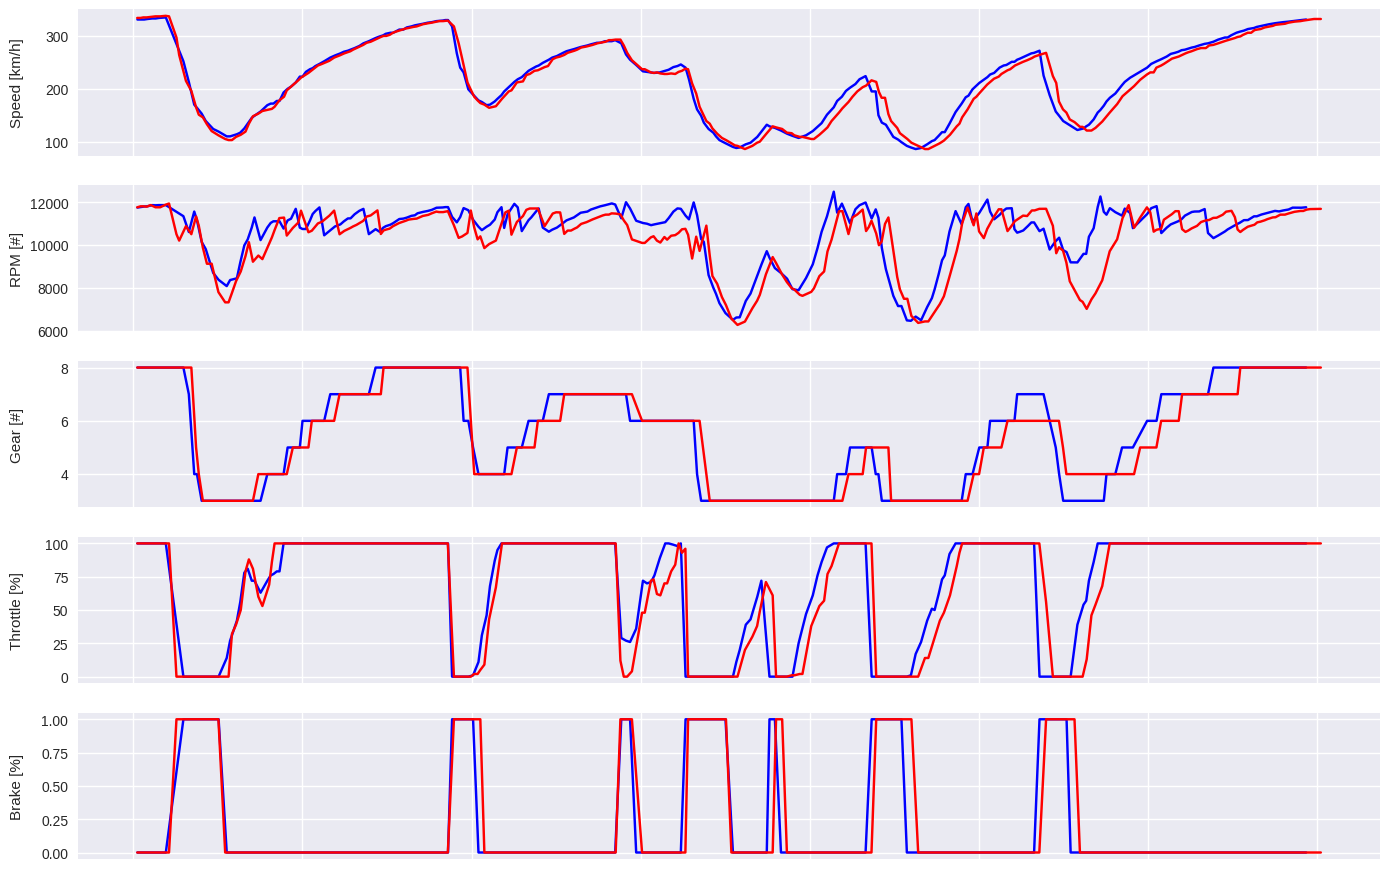

In [30]:
from fastf1 import plotting
plotting.setup_mpl()

fig, ax = plt.subplots(5,figsize=(14,10))

color_driver1 = "red"
color_driver2 = "blue"

ax[0].plot(ant_telemetry['Time'], ant_telemetry['Speed'], color=color_driver2)
ax[0].plot(ver_telemetry['Time'], ver_telemetry['Speed'], color=color_driver1)

ax[1].plot(ant_telemetry['Time'], ant_telemetry['RPM'], color=color_driver2)
ax[1].plot(ver_telemetry['Time'], ver_telemetry['RPM'], color=color_driver1)

ax[2].plot(ant_telemetry['Time'], ant_telemetry['nGear'], color=color_driver2)
ax[2].plot(ver_telemetry['Time'], ver_telemetry['nGear'], color=color_driver1)

ax[3].plot(ant_telemetry['Time'], ant_telemetry['Throttle'], color=color_driver2)
ax[3].plot(ver_telemetry['Time'], ver_telemetry['Throttle'], color=color_driver1)

ax[4].plot(ant_telemetry['Time'], ant_telemetry['Brake'], color=color_driver2)
ax[4].plot(ver_telemetry['Time'], ver_telemetry['Brake'], color=color_driver1)

ax[0].set_ylabel("Speed [km/h]")
ax[1].set_ylabel("RPM [#]")
ax[2].set_ylabel("Gear [#]")
ax[3].set_ylabel("Throttle [%]")
ax[4].set_ylabel("Brake [%]")

ax[0].get_xaxis().set_ticklabels([])
ax[1].get_xaxis().set_ticklabels([])
ax[2].get_xaxis().set_ticklabels([])
ax[3].get_xaxis().set_ticklabels([])
ax[4].get_xaxis().set_ticklabels([])

fig.align_ylabels()

plt.subplots_adjust(left=0.06 ,right=0.99, top=0.9, bottom=0.05)
plt.show()